# House Price Prediction                                  

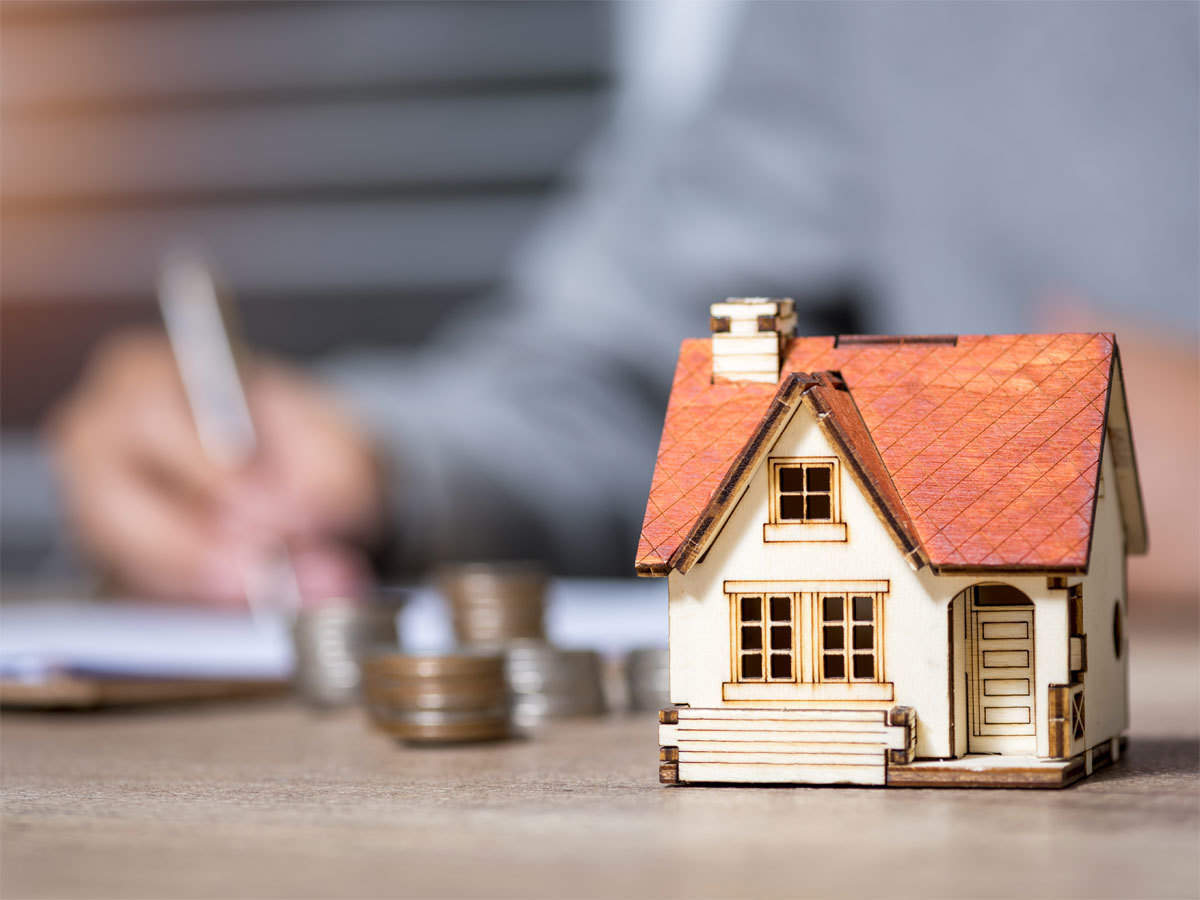

# Problem Statement
- This is the data of a Real Estate company where they are trying to find Property Price evaluations as per the location and needs to develop a predictive machine learning model.

### Overview of the problem Statement
- We are creating a machine learning model to predict property prices using data provided by a real estate company. This involves analyzing information about the location and features of properties to estimate their value.

- We're developing this model to help the real estate company accurately evaluate property prices. By using machine learning, we can process large amounts of data and identify patterns that influence property prices. This will enable the company to make more informed decisions when buying, selling, or valuing properties.

## Objective:
- To develop a predictive machine learning model that accurately estimates property prices based on various factors such as location and property features.
- To compare different machine learning algorithms and features to identify the most effective approach for predicting property prices. 

# Load the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# control and manage warnings
import warnings
warnings.filterwarnings('ignore')

# Data visualization setup
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # Set the style of seaborn

# Load the Dataset

In [2]:
# Load the dataset from "Bengaluru_House_Data.csv" into a Pandas DataFrame
df = pd.read_csv("Bengaluru_House_Data.csv", encoding='ISO-8859-1')

# Display the first 30 rows of the DataFrame 'df'
df.head(30)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,$38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,$204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,$600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,$63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,$370.00


In [3]:
df.tail(15) # Display the last 15 rows of the DataFrame 'df'

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13305,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500,1.0,3.0,220
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325
13307,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805,3.0,3.0,134
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,Baanise,1527,3.0,1.0,142
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675,3.0,NaN,92.13
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112


# Basic Understanding of the dataset

In [4]:
# Display the shape of the dataset
df.shape

(13320, 9)

In [5]:
# Display information about the dataset including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


# Missing Value Treatment

In [6]:
# Compute the count of missing values in each column
missing_values_count = df.isnull().sum()

# Compute the percentage of missing values in each column
missing_values_percentage = (df.isnull().sum() * 100) / len(df)

# Create a DataFrame to display both the count and percentage of missing values
missing_values_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

missing_values_summary

,Missing Values Count,Missing Values Percentage
area_type,0,0.000000
availability,0,0.000000
location,1,0.007508
size,16,0.120120
society,5502,41.306306
total_sqft,0,0.000000
bath,73,0.548048
balcony,609,4.572072
price,0,0.000000


- "society" column contains a large number of missing values, we might drop the column.

In [7]:
# Impute missing values in the 'location', 'size', 'bath', 'balcony', and 'price' columns with appropriate strategies
df['location'].fillna(df['location'].mode()[0], inplace=True)  # Replace missing values in 'location' with the mode (most frequent value)
df['size'].fillna(df['size'].mode()[0], inplace=True)  # Replace missing values in 'size' with the mode (most frequent value)
df['bath'].fillna(df['bath'].median(), inplace=True)  # Replace missing values in 'bath' with the median
df['balcony'].fillna(df['balcony'].median(), inplace=True)  # Replace missing values in 'balcony' with the median

# Drop the 'society' column due to a high percentage of missing values
df.drop('society', axis=1, inplace=True)

In [8]:
# Count the number of missing values in each column
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Price - Target Variable

In [9]:
# Get unique values in the 'price' column
df['price'].unique()

array(['$39.07 ', '$120.00 ', '$62.00 ', ..., '40.14', '231', '488'],
      dtype=object)

In [10]:
# checking  rows where the 'price' column contains a dollar sign ($)
dollar_sign_rows = df[df['price'].str.contains('\$', na=False)]
dollar_sign_rows.shape # Check the shape (number of rows and columns)

(23, 8)

In [11]:
# checking rows where the 'price' column contains a question_mark sign (?)
question_mark_rows = df[df['price'].str.contains('\?', na=False)]
question_mark_rows.shape # check the shape (number of rows and columns)

(202, 8)

In [12]:
# checking rows where the 'price' column contains a euro sign (€)
euro_rows = df[df['price'].str.contains('\x80', na=False)]
euro_rows.shape  # check the shape (number of rows and columns)

(110, 8)

In [13]:
# checking rows where the 'price' column contains a range value (i.e. 25.25-30)
range_rows = df[df['price'].str.contains('-')]
range_rows.shape # check the shape (number of rows and columns)

(3, 8)

In [14]:
# Remove leading and trailing spaces from the 'price' column
df['price'] = df['price'].str.strip()

# Convert the values in the 'price' column to a consistent format (e.g., without leading/trailing spaces)
df['price'] = df['price'].str.replace('[$?\x80]', '', regex=True) # Remove '$', '?' or '€' if present

In [15]:
def convert_range_to_num(x):
    # Split the string by '-' to get individual tokens
    tokens = x.split('-')
    # If there are exactly two tokens, calculate the average and return
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        # Try converting the string to a float
        return float(x)
    except:
        # If conversion fails, return the original string
        return x

# Apply the convert_range_to_num function to the 'price' column in the DataFrame
df['price'] = df['price'].apply(convert_range_to_num)

In [16]:
# Count the number of missing values in each column
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [17]:
# check the data type of the 'price' column
df['price'].dtype

dtype('float64')

In [18]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


## Area Type Column

In [19]:
# Calculate counts of each area type
area_type_counts = df['area_type'].value_counts()
area_type_counts

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

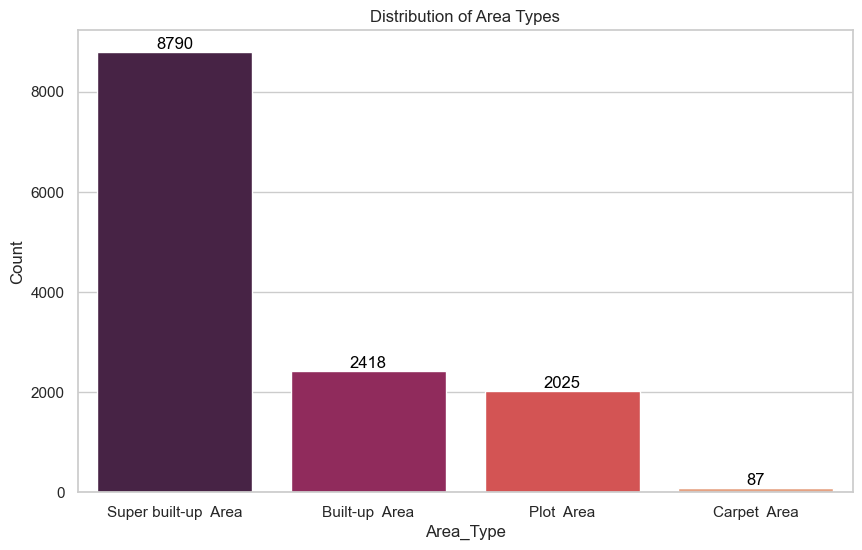

In [20]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with custom color palette
sns.barplot(x=area_type_counts.index, y=area_type_counts,  palette='rocket')

# Adding annotations to the bars
for index, value in enumerate(area_type_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black')

# Set plot title and labels
plt.title('Distribution of Area Types')
plt.xlabel('Area_Type')
plt.ylabel('Count')
plt.show()

- "Super built-up area" is the most common 
- "Built-up area" and "plot area" are less common but still visible.
- "Carpet area" is the rarest of all.

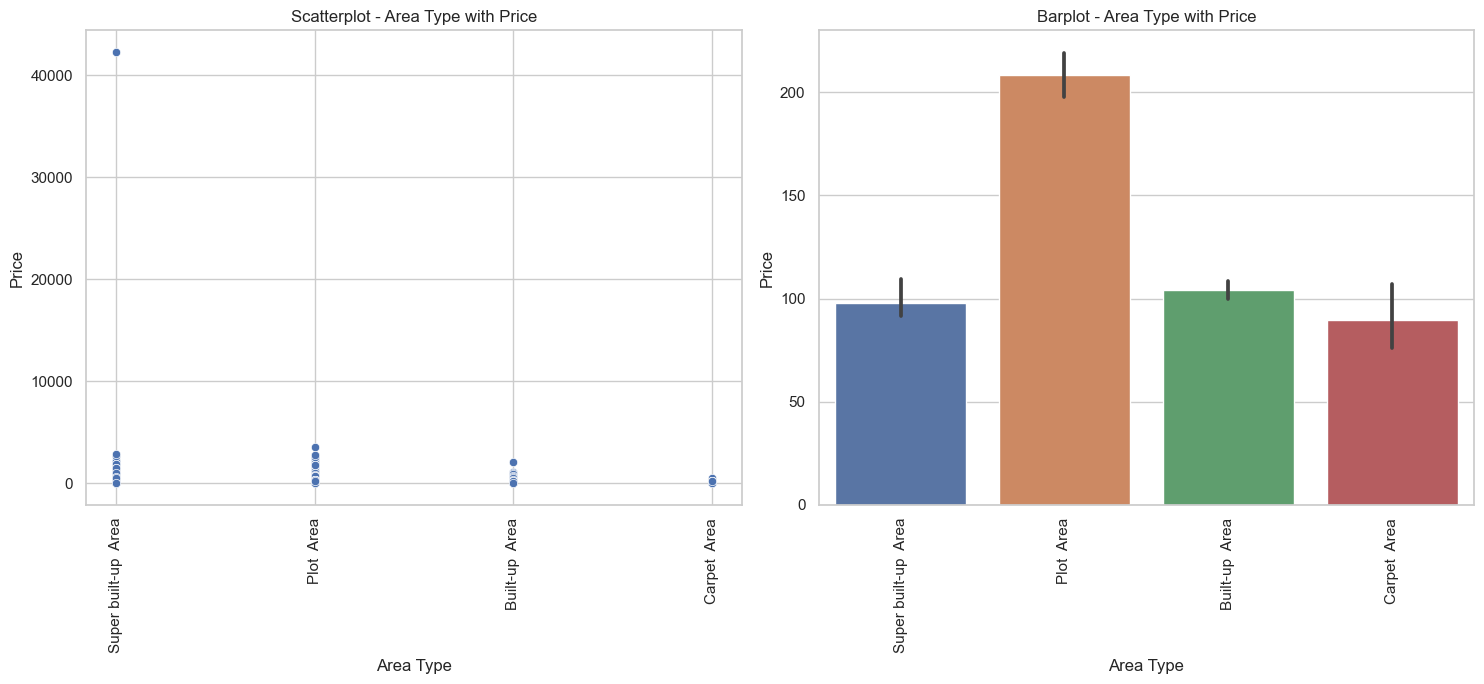

In [21]:
# Set figure size
plt.figure(figsize=(15, 7))

# Scatter plot for 'area_type' with 'price' columns
plt.subplot(1, 2, 1)
sns.scatterplot(x='area_type', y='price', data=df, palette='deep')
plt.title('Scatterplot - Area Type with Price')
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Barplot for 'area_type' with 'price' columns
plt.subplot(1, 2, 2)
sns.barplot(x='area_type', y='price', data=df, palette='deep')
plt.title('Barplot - Area Type with Price')
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

#### From the above graphs,
- The "area type" doesn't seem to have a significant impact on the price. 
- Therefore, it might not provide useful information for predicting prices accurately in our model.
- So we can drop it from analysis.

In [22]:
# Drop the 'area_type' column from the DataFrame
df.drop('area_type', axis=1, inplace=True)

## Availability Column

In [23]:
# Check unique values in the 'availability' column
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [24]:
 # Count the occurrences of each value in the 'availability' column
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [25]:
# Matching pattern and setting values
pattern = '\d{1,2}-[a-zA-Z]{3}'
df.loc[df['availability'].str.match(pattern), 'availability'] = 'Available Soon'

In [26]:
# Count the occurrences of each availability
availability_counts = df['availability'].value_counts()
availability_counts # Display the counts

Ready To Move           10581
Available Soon           2723
Immediate Possession       16
Name: availability, dtype: int64

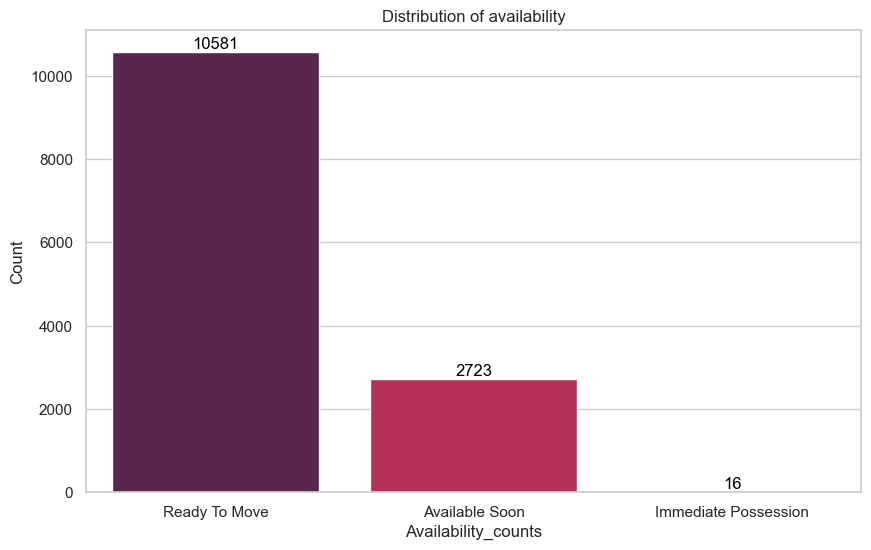

In [27]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with custom color palette
sns.barplot(x=availability_counts.index, y=availability_counts,  palette='rocket')

# Adding annotations to the bars
for index, value in enumerate(availability_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black')

# Set plot title and labels
plt.title('Distribution of availability')
plt.xlabel('Availability_counts')
plt.ylabel('Count')
plt.show()

#### From the above graphs,
- The majority of properties are listed as "Ready to Move", followed by "Available Soon”.

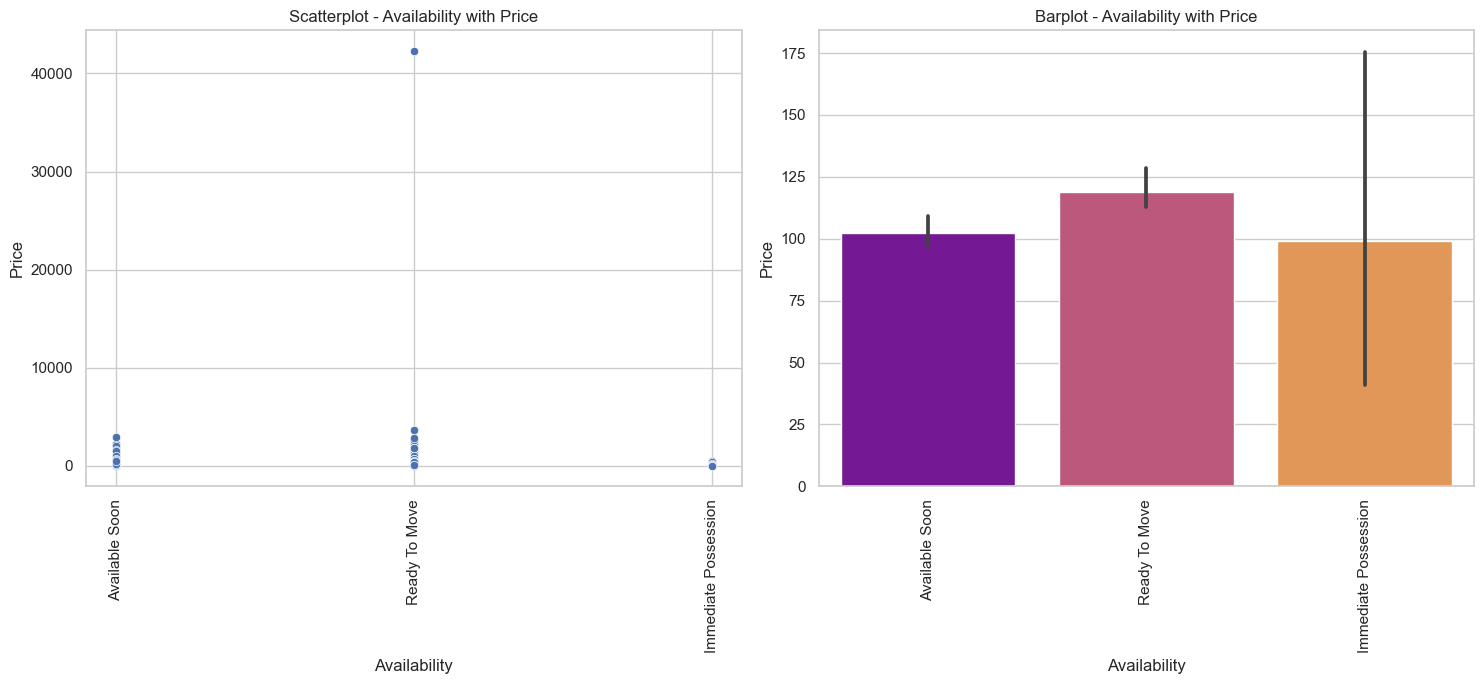

In [28]:
# Set figure size
plt.figure(figsize=(15, 7))

# Scatter plot for 'availability' with 'price' columns
plt.subplot(1, 2, 1)
sns.scatterplot(x='availability', y='price', data=df, palette='plasma')
plt.title('Scatterplot - Availability with Price')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Barplot for 'availability' with 'price' columns
plt.subplot(1, 2, 2)
sns.barplot(x='availability', y='price', data=df, palette='plasma')
plt.title('Barplot - Availability with Price')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

- The prices of properties categorized as "Available Soon" and "Ready to Move" seem to be very similar.
- This means that the availability of properties doesn't affect their prices differently.
- So, it might make sense to remove the availability from analysis. 

In [29]:
# Drop the 'availability' column from the DataFrame
df.drop('availability', axis=1, inplace=True)

## Location Column

In [30]:
# Count the occurrences of each location in the 'location' column of the DataFrame,
# then select the top 10 most frequent locations
location_counts_10 = df['location'].value_counts().nlargest(10)

# Display the resulting top 10 locations and their respective counts
location_counts_10

Whitefield               541
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
Yelahanka                213
Uttarahalli              186
Hebbal                   177
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

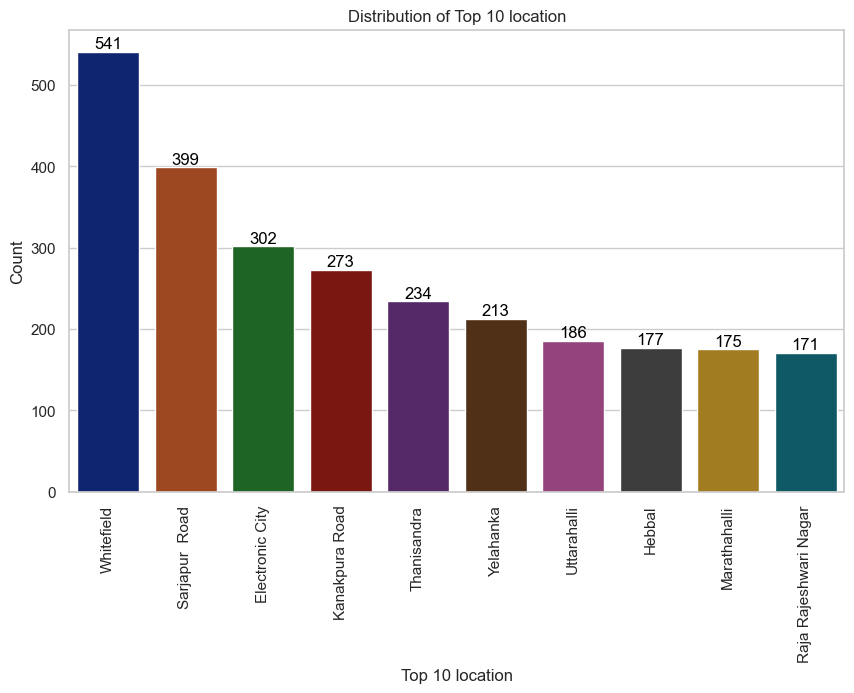

In [31]:
# Get the top 10 locations with the highest frequencies
location_counts_10 = df['location'].value_counts().nlargest(10) 

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with custom color palette
sns.barplot(x=location_counts_10.index, y=location_counts_10,  palette='dark')

# Adding annotations to the bars
for index, value in enumerate(location_counts_10):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black')

# Set plot title and labels
plt.title('Distribution of Top 10 location')
plt.xlabel('Top 10 location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

- Whitefield has the highest frequency of properties listed, followed by Sarjapur Road and Electronic City.

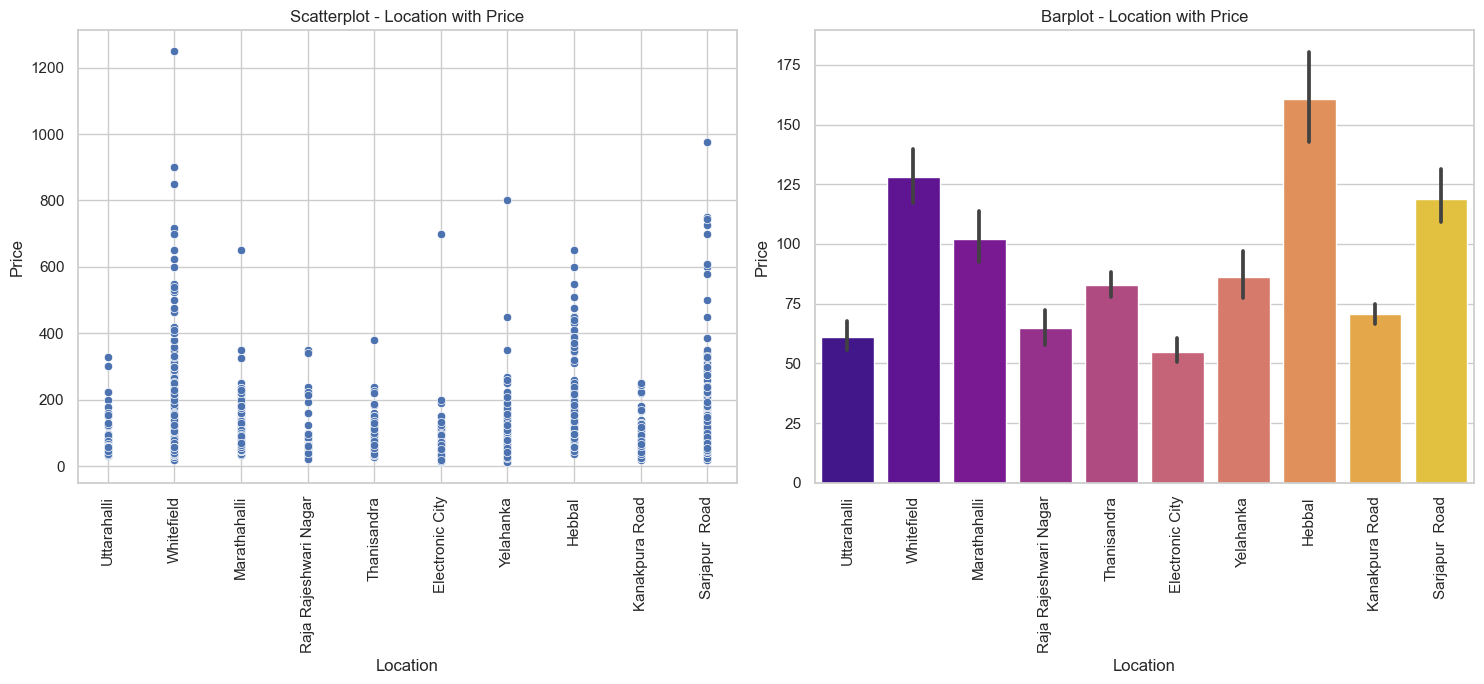

In [32]:
# Get the top 10 locations with the highest frequencies
location_counts_10 = df['location'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 locations
df_top_locations = df[df['location'].isin(location_counts_10.index)]

# Set figure size
plt.figure(figsize=(15, 7))

# Scatter plot for 'location' with 'price' columns
plt.subplot(1, 2, 1)
sns.scatterplot(x='location', y='price', data=df_top_locations, palette='plasma')
plt.title('Scatterplot - Location with Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Barplot for 'location' with 'price' columns
plt.subplot(1, 2, 2)
sns.barplot(x='location', y='price', data=df_top_locations, palette='plasma')
plt.title('Barplot - Location with Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

- Hebbal, Sarjapur Road and Whitefield are the top 3 locations that have the highest prices for houses.

## Size Column

In [33]:
 # Count occurrences of each size in the 'size' column
size_counts = df['size'].value_counts()
size_counts  # Display the counts

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

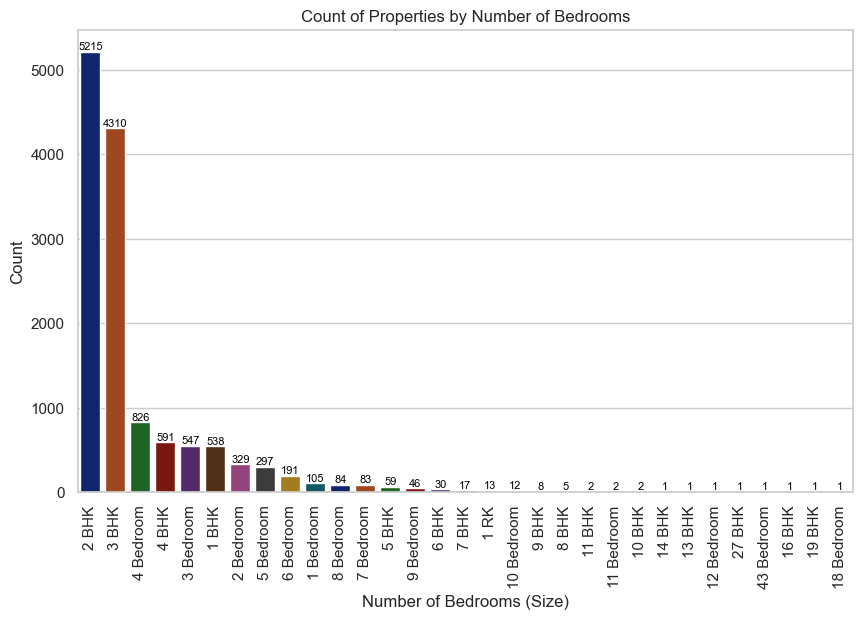

In [34]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with custom color palette
sns.barplot(x=size_counts.index, y=size_counts,  palette='dark')

# Adding annotations to the bars
for index, value in enumerate(size_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', fontsize=8)

# Set plot title and labels
plt.title('Count of Properties by Number of Bedrooms')
plt.xlabel('Number of Bedrooms (Size)')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [35]:
 # Check unique values in the 'size' column 
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

- "1" typically stands for "RK," which means "one room kitchen." This is quite similar to "1 BHK," which stands for "one bedroom, hall, and kitchen."
- we're just taking the numbers from the "size" column, which represent the number of rooms in each property
- So, to make things easier to understand and work with, we'll just focus on the numbers in that column. 

In [36]:
# Extract the integer part from the 'size' column and create a new column 'bhk_size'
df['bhk_size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [37]:
df.head() # Display the first few rows

,location,size,total_sqft,bath,balcony,price,bhk_size
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [38]:
# Check unique values from the 'bhk_size' column
df['bhk_size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [39]:
# Count the occurrences of each unique value in the 'bhk_size' column
bhk_size_counts = df['bhk_size'].value_counts()

# Display the counts of each unique value in the 'bhk_size' column
bhk_size_counts

2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk_size, dtype: int64

In [40]:
# Sorting the counts of BHK sizes in ascending order
bhk_size_counts_sorted = bhk_size_counts.sort_index()
bhk_size_counts_sorted

1      656
2     5544
3     4857
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk_size, dtype: int64

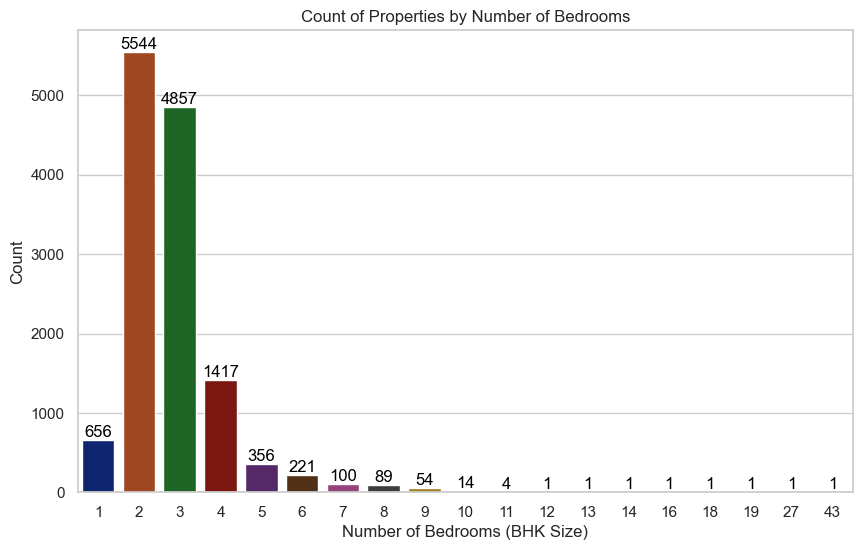

In [41]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with custom color palette
sns.barplot(x=bhk_size_counts_sorted.index, y=bhk_size_counts_sorted,  palette='dark')

# Adding annotations to the bars
for index, value in enumerate(bhk_size_counts_sorted):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black')

# Set plot title and labels
plt.title('Count of Properties by Number of Bedrooms')
plt.xlabel('Number of Bedrooms (BHK Size)')
plt.ylabel('Count')

plt.show()

- In Bengaluru, People prefer 2 BHK and 3 BHK houses the most 
- It's unlikely for a house to have 27 or 43 bedrooms. So we need to check them.

In [42]:
# Calculate the average price for each bhk_size category with two decimal places
average_price_by_bhk = df.groupby('bhk_size')['price'].mean().sort_index().round(2)
average_price_by_bhk

bhk_size
1      44.64
2      59.69
3     119.45
4     270.63
5     281.55
6     223.93
7     244.37
8     207.55
9     241.94
10    530.00
11    207.50
12    300.00
13    275.00
14    125.00
16    550.00
18    200.00
19    490.00
27    230.00
43    660.00
Name: price, dtype: float64

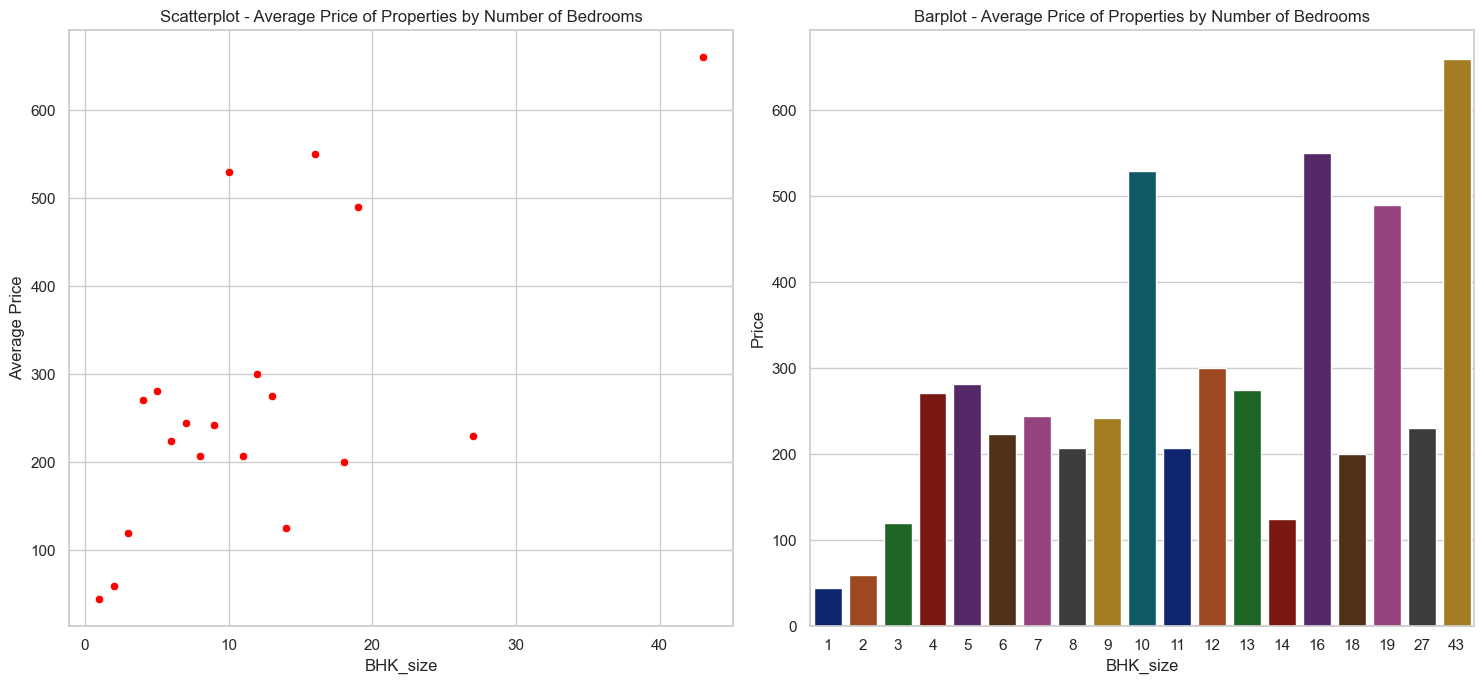

In [43]:
# Set figure size
plt.figure(figsize=(15, 7))

# Scatter plot for 'bhk_size' with 'price' columns
plt.subplot(1, 2, 1)
sns.scatterplot(x=average_price_by_bhk.index, y=average_price_by_bhk.values, color='red')
plt.title('Scatterplot - Average Price of Properties by Number of Bedrooms')
plt.xlabel('BHK_size')
plt.ylabel('Average Price')

# Barplot for 'bhk_size' with 'price' columns
plt.subplot(1, 2, 2)
sns.barplot(x=average_price_by_bhk.index, y=average_price_by_bhk.values, palette='dark')
plt.title('Barplot - Average Price of Properties by Number of Bedrooms')
plt.xlabel('BHK_size')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

- We noticed some values like 27 and 43 listed as the number of bedrooms ("bhk"). These values don't make much sense because it's unlikely for a house to have 27 or 43 bedrooms. So we need to check them.

In [44]:
# Select rows where the 'bhk_size' column value is greater than 15
df[df['bhk_size']>15]

,location,size,total_sqft,bath,balcony,price,bhk_size
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,2.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,2.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,2.0,200.0,18


- Here is a 43-bedroom house with just 2400 square feet, and an 18-bedroom house with just 1200 square feet. 
- These points seem like errors or outliers, so we should check the 'total_sqft' column to understand if there are any inconsistencies or mistakes in the data before removing these outliers.

- Here, we already add one column as bhk_size. So we can drop the column "size"

In [45]:
# Drop the 'size' column from the DataFrame
df.drop('size', axis=1, inplace=True)

## Total Sqft Column

In [46]:
# Check unique values in the 'total_sqft' column
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

- We noticed that there are values like '1133-1384' which could impact our calculations later on.

In [47]:
# Select rows where 'total_sqft' column contains a dash (-)
range_rows1 = df[df['total_sqft'].str.contains('-')] 
range_rows1.shape  # Get the shape (number of rows and columns) 

(201, 6)

In [48]:
# Applying the convert_range_to_num function to the 'total_sqft' column of the DataFrame df
df['total_sqft'] = df['total_sqft'].apply(convert_range_to_num)

In [49]:
# Function to check if a value is not int or float
def is_not_int_or_float(value):
    return not isinstance(value, (int, float))

# Filter rows where values are not int or float
filtered_df = df['total_sqft'].apply(is_not_int_or_float)

# Print rows where at least one value is not int or float
df[filtered_df]

,location,total_sqft,bath,balcony,price,bhk_size
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.50,1
648,Arekere,4125Perch,9.0,2.0,265.00,9
775,Basavanagara,1000Sq. Meter,2.0,1.0,93.00,1
872,Singapura Village,1100Sq. Yards,2.0,2.0,45.00,2
1019,Marathi Layout,5.31Acres,1.0,0.0,110.00,1
1086,Narasapura,30Acres,2.0,2.0,29.50,2
1400,Chamrajpet,716Sq. Meter,9.0,1.0,296.00,9
1712,Singena Agrahara,1500Sq. Meter,3.0,1.0,95.00,3
1743,Hosa Road,142.61Sq. Meter,3.0,1.0,115.00,3
1821,Sarjapur,1574Sq. Yards,3.0,1.0,76.00,3


In [50]:
df[filtered_df].shape  # Shape of the filtered DataFrame subset

(46, 6)

- We've noticed 46 unique values(0.345% of dataset) in our dataset, which isn't a large number.
- Since they have a minimal effect on our analysis, it's safe to remove them.

In [51]:
# Drop rows where 'total_sqft' contains values that are not int or float
df.drop(df[filtered_df].index, inplace=True)

In [52]:
# Convert the 'total_sqft' column to float
df['total_sqft'] = df['total_sqft'].astype(float)

In [53]:
df['total_sqft'].dtype  # Accessing the data type of the 'total_sqft' column in the DataFrame

dtype('float64')

In [54]:
df.shape 

(13274, 6)

## Bath 

In [55]:
# Check unique values in the 'bath' column
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [56]:
# Count occurrences of each value in the 'bath' column
df['bath'].value_counts()

2.0     6966
3.0     3275
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [57]:
# Get the value counts of 'bath' column and sort by index
bath_counts = df['bath'].value_counts().sort_index()
bath_counts

1.0      781
2.0     6966
3.0     3275
4.0     1222
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

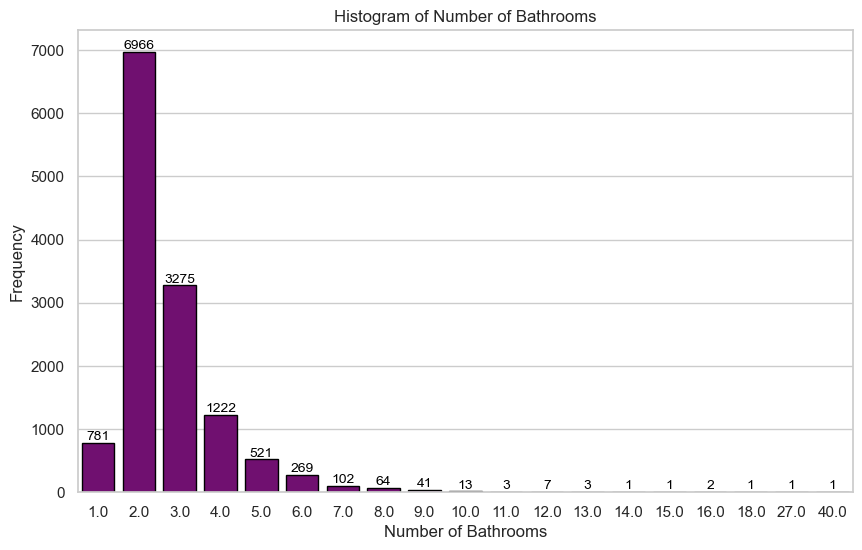

In [58]:
# Plotting a histogram for the 'bath' column using seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

# Creating a bar plot using seaborn with specified color and edge color
sns.barplot(x=bath_counts.index, y=bath_counts.values, color='purple', edgecolor='black')

# Adding annotations to the bars
for index, value in enumerate(bath_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Number of Bathrooms')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Histogram of Number of Bathrooms')  # Title for the plot
plt.show()  # Display the plot

- The majority of properties have 2 bathrooms, followed by 3 bathrooms and then 4 bathrooms.
- There are more properties with fewer bathrooms compared to properties with more bathrooms.

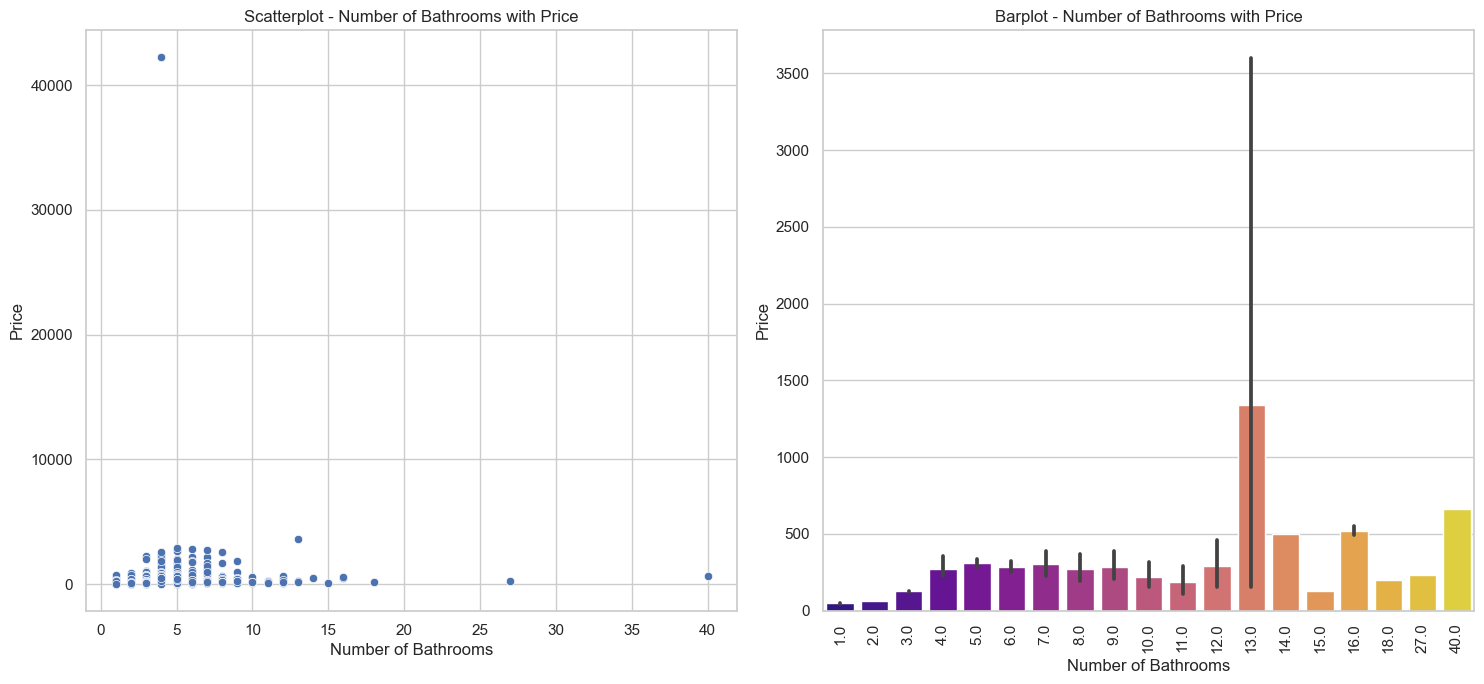

In [59]:
# Set the figure size for the plot
plt.figure(figsize=(15, 7))

# Scatter plot to show the relationship between 'bath' and 'price' columns
plt.subplot(1, 2, 1)
sns.scatterplot(x='bath', y='price', data=df)
plt.title('Scatterplot - Number of Bathrooms with Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

# Bar plot to show the average 'price' for each 'bath' category
plt.subplot(1, 2, 2)
sns.barplot(x='bath', y='price', data=df, palette='plasma')
plt.title('Barplot - Number of Bathrooms with Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()

- There seems to be a positive correlation between the number of bathrooms and the price of properties.
- Generally, properties with a higher number of bathrooms tend to have higher prices.
- However, there are some outliers where properties with fewer bathrooms have higher prices, and vice versa.

## Balcony Column

In [60]:
# Check unique values in the 'balcony' column
df['balcony'].unique()

array([1., 3., 2., 0.])

In [61]:
df['balcony'].value_counts() # Count occurrences of each value in the 'balcony' column

2.0    5706
1.0    4880
3.0    1669
0.0    1019
Name: balcony, dtype: int64

In [62]:
# Get the value counts of 'bath' column and sort by index
balcony_counts = df['balcony'].value_counts().sort_index()
balcony_counts

0.0    1019
1.0    4880
2.0    5706
3.0    1669
Name: balcony, dtype: int64

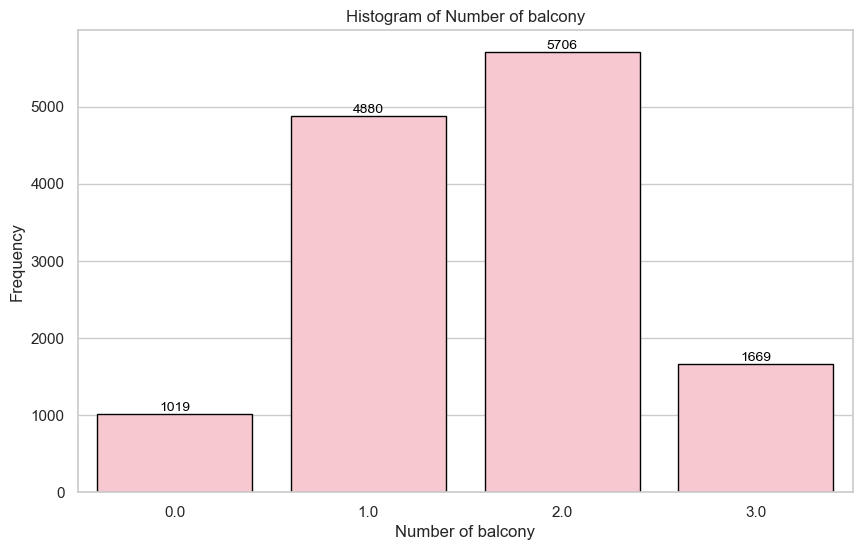

In [63]:
# Plot histogram for the 'bath' column using seaborn
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create a bar plot using seaborn with specified colors and edgecolor
sns.barplot(x=balcony_counts.index, y=balcony_counts.values, color='pink', edgecolor='black')

# Adding annotations to the bars
for index, value in enumerate(balcony_counts):  # Loop through index and value pairs of balcony_counts
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', fontsize=10)  # Add text annotations to each bar

plt.xlabel('Number of balcony')  # Set label for x-axis
plt.ylabel('Frequency')  # Set label for y-axis
plt.title('Histogram of Number of balcony')  # Set title for the plot
plt.show()  # Display the plot

- The majority of properties have either 1 or 2 balconies, with a significant number of properties having 0 balconies as well.
- There are relatively fewer properties with 3 balconies.

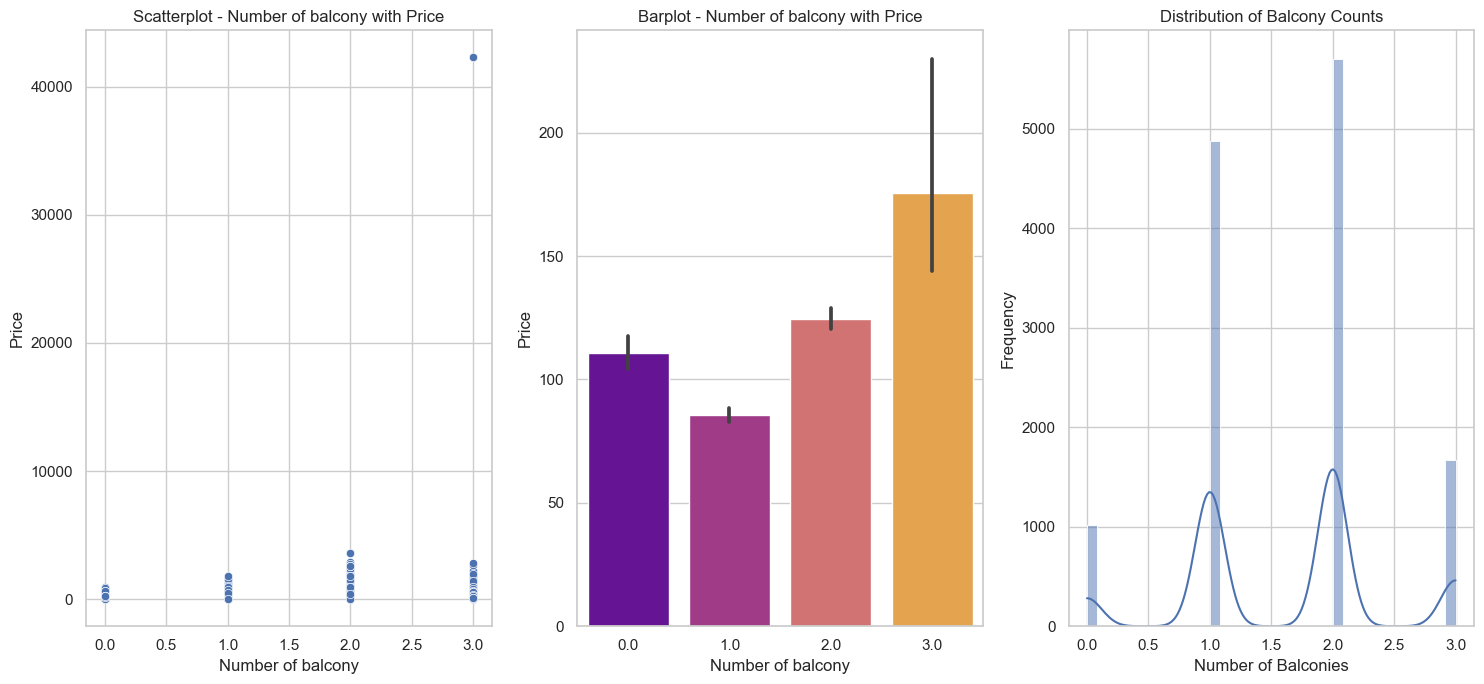

In [64]:
# Set figure size
plt.figure(figsize=(15, 7))

# Scatter plot for 'bath' with 'price' columns
plt.subplot(1, 3, 1)
sns.scatterplot(x='balcony', y='price', data=df)
plt.title('Scatterplot - Number of balcony with Price')
plt.xlabel('Number of balcony')
plt.ylabel('Price')

# Barplot for 'bath' with 'price' columns
plt.subplot(1, 3, 2)
sns.barplot(x='balcony', y='price', data=df, palette='plasma')
plt.title('Barplot - Number of balcony with Price')
plt.xlabel('Number of balcony')
plt.ylabel('Price')

# Histogram  for the 'balcony' column
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='balcony', kde=True)
plt.title('Distribution of Balcony Counts')
plt.xlabel('Number of Balconies')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- From the scatter plot, we can see that the prices of properties with 2 and 3 balconies appear to be very similar. 
- This means that the number of balconies may not have a significant impact on the price of properties.
- It might be reasonable to consider removing the balcony column from our analysis.

In [65]:
# Drop the 'balcony' column from the DataFrame
df.drop('balcony', axis=1, inplace=True)

In [66]:
df.head()

,location,total_sqft,bath,price,bhk_size
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [67]:
df.shape

(13274, 5)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13274 non-null  object 
 1   total_sqft  13274 non-null  float64
 2   bath        13274 non-null  float64
 3   price       13274 non-null  float64
 4   bhk_size    13274 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 622.2+ KB


## Feature engineering for outlier detection, dimension reduction

In [69]:
# Calculate price per square foot and add it as a new column
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Display 'price_per_sqft' column with only two decimal points
df['price_per_sqft'] = df['price_per_sqft'].round(2)

In [70]:
df.head()

,location,total_sqft,bath,price,bhk_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


- Different locations have different rates per square foot, indicating that location is an important factor in determining prices.
- To use location data effectively, it needs to be converted into a numerical format suitable for calculations.
- One-Hot Encoding is a technique used to convert categorical data into a numerical format suitable for machine learning algorithms.
- One-Hot Encoding can lead to a high-dimensional dataset, known as the "curse of dimensionality," which may require additional processing or dimensionality reduction techniques.(reducing the number of locations by using dimensionality reduction technique)

In [71]:
# Check unique values in the 'location' column
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [72]:
# Count the number of unique values in the 'location' column
len(df['location'].unique())

1299

In [73]:
# Remove spaces before and after location names
df['location'] = df['location'].apply(lambda x: x.strip())

# Get the count of each unique location in descending order
location_stats = df['location'].value_counts(ascending=False)

# Display the location statistics
print(location_stats)

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    271
Thanisandra                       236
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1288, dtype: int64


In [74]:
# Total count of all locations
print('Total count of all locations:', location_stats.sum())

# Number of unique locations
print('Number of unique locations:', len(location_stats))

Total count of all locations: 13274
Number of unique locations: 1288


- So we can see that Whitefield occurs 540 times.
- Now one way to reduce the dimensionality is to assign all the locations that are below a threshold as "others" and only keep those locations that are above the threshold.

In [75]:
# Calculate the threshold value by summing up location statistics and dividing by the number of data points
threshold_value = round((location_stats.sum())/len(location_stats))

# Print the calculated threshold value
print('Threshold Value:', threshold_value)

Threshold Value: 10


- So we will keep all the locations that are below 10 as "others".

In [76]:
# Count the number of elements in location_stats where the value is greater than 10
len(location_stats[location_stats>10])

240

In [77]:
# Count the number of location_stats values less than or equal to 10
len(location_stats[location_stats<=10])

1048

## Dimensionality Reduction
- Any location having less than 10 data points should be tagged as "other" location.
- This way number of categories can be reduced by huge amount.
- Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [78]:
# Filter locations where the statistics are less than or equal to 10
location_stats_less_than_10 = location_stats[location_stats <= 10]

# Display locations with statistics less than or equal to 10
location_stats_less_than_10

Sadashiva Nagar                   10
BTM 1st Stage                     10
Nagadevanahalli                   10
Sector 1 HSR Layout               10
Basapura                          10
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1048, dtype: int64

In [79]:
# Update 'location' column in DataFrame:
# If location occurs less than 10 times, replace it with 'other', otherwise keep it unchanged
df['location'] = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [80]:
 # Count the number of unique locations in the 'location' column
len(df['location'].unique())

241

- So, as can be seen from Above, 240 was the total number of lcoations that appeared on the data more than 10 times while the rest were included in "others". 
- Hence the total number of unique values decreased from 1299 to 241(240 + 1)

In [81]:
# Count occurrences of each value in the 'location' column
df['location'].value_counts()

other              2876
Whitefield          540
Sarjapur  Road      399
Electronic City     304
Kanakpura Road      271
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: location, Length: 241, dtype: int64

In [82]:
df.shape

(13274, 6)

### Outlier Detection And Removal

- Usually 300 is the sqft per bedroom i.e for example a 3bhk house with 600 sqft total size seems like an outlier, hence we remove such outliers.

In [83]:
# Filtering out rows where the ratio of total_sqft to bhk_size is less than 300
df1 = df[~(df['total_sqft'] / df['bhk_size'] < 300)]

# Displaying the first few rows of the filtered dataframe
df1.head()

,location,total_sqft,bath,price,bhk_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [84]:
df1.shape

(12530, 6)

### **Removing Outlier using std_dev and mean** from "Location" and "BHK_Size(Size)"

In [85]:
# Descriptive statistics for the 'price_per_sqft' column
df1['price_per_sqft'].describe()

count     12530.000000
mean       6375.181590
std        9100.606352
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      912343.550000
Name: price_per_sqft, dtype: float64

In [86]:
def remove_outliers(df):
    df_outliers_removed = pd.DataFrame()  # Initialize an empty DataFrame to store outliers-removed data
    
    for location, location_df in df.groupby('location'):  # Group DataFrame by 'location'
        mean_price = np.mean(location_df['price_per_sqft'])  # Calculate mean price per square foot
        std_price = np.std(location_df['price_per_sqft'])  # Calculate standard deviation of price per square foot
        
        # Filter out rows within 1 standard deviation from the mean
        filtered_df = location_df[(location_df['price_per_sqft'] > (mean_price - std_price)) & 
                                  (location_df['price_per_sqft'] <= (mean_price + std_price))]
        
        # Concatenate filtered dataframes
        df_outliers_removed = pd.concat([df_outliers_removed, filtered_df], ignore_index=True)
    
    return df_outliers_removed  # Return DataFrame with outliers removed

# Example usage
df2 = remove_outliers(df1)  # Remove outliers from DataFrame df1
print(df2.shape)  # Print the shape of the resulting DataFrame

(10513, 6)


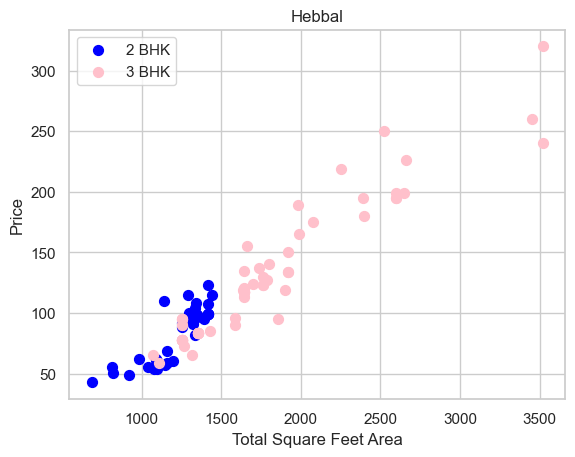

In [87]:
def scatter_plot(df, location):
    # Filter data for 2 BHK and 3 BHK properties in the given location
    bhk_2 = df[(df['location'] == location) & (df['bhk_size'] == 2)]
    bhk_3 = df[(df['location'] == location) & (df['bhk_size'] == 3)]
    
    # Plot 2 BHK properties
    plt.scatter(bhk_2['total_sqft'], bhk_2['price'], color='blue', label='2 BHK', s=50)
    # Plot 3 BHK properties
    plt.scatter(bhk_3['total_sqft'], bhk_3['price'], color='pink', label='3 BHK', s=50)
    
    # Set labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

# Example usage
scatter_plot(df2, "Hebbal")
plt.show() # Display scatter plot comparing prices of 2 BHK and 3 BHK properties in Hebbal


- We can see that in the same location a 2bhk house costs more than a 3bhk house with the same area. 
- So, we create a dictionary of statistics per bhk and remove those 2bhk houses where the price_per_sqft is less than the mean price_per_sqft of 1bhk house

In [88]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])  # Initialize an empty array to store indices of outliers
    
    # Group data by location
    for location, location_df in df.groupby('location'):
        bhk_stats = {}  # Dictionary to store statistics for different BHK sizes
        
        # Calculate mean, standard deviation, and count for each BHK size in the location
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        
        # Identify outliers for each BHK size based on previous BHK statistics
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            stats = bhk_stats.get(bhk - 1)  # Statistics for previous BHK size
            if stats and stats['count'] > 5:  # Check if stats exist and have sufficient data points
                # Append indices of outliers to exclude_indices array
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
                
    # Remove outliers from the dataframe
    return df.drop(exclude_indices, axis='index')

# Example usage
df3 = remove_bhk_outliers(df2)
print(df3.shape)  # Print the shape of the dataframe after removing outliers

(7316, 6)


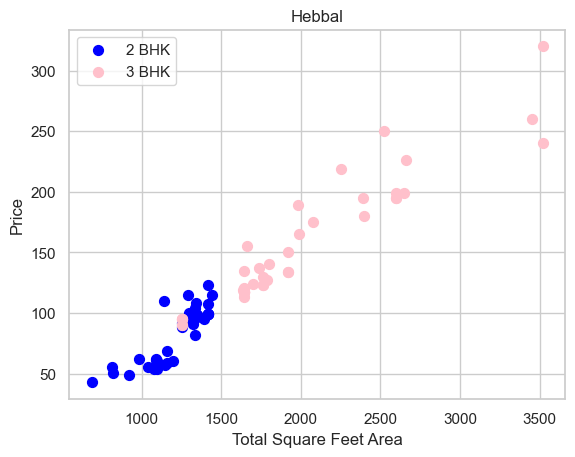

In [89]:
# Plot a scatter plot using data from df3 for the 'Hebbal' location
scatter_plot(df3,'Hebbal')

### Removing Outlier  from "Bath" Column

In [90]:
# Select rows where the 'bath' column has values greater than 10
df3[df3['bath']>10]

,location,total_sqft,bath,price,bhk_size,price_per_sqft
5314,Neeladri Nagar,4000.0,12.0,160.0,10,4000.00
8209,other,3300.0,14.0,500.0,9,15151.52
8679,other,10000.0,16.0,550.0,16,5500.00
9494,other,6000.0,12.0,150.0,11,2500.00
9860,other,5425.0,13.0,275.0,13,5069.12


- As it is uncommon to have 2 more bathrooms than the bedrooms in a house we remove those datapoints

In [91]:
# Filter DataFrame df3 where the number of bathrooms (bath) is greater than the number of bedrooms (bhk_size) plus 2
df4 = df3[df3['bath'] > df3['bhk_size'] + 2]

In [92]:
df4.head()

,location,total_sqft,bath,price,bhk_size,price_per_sqft
1638,Chikkabanavar,2460.0,7.0,80.0,4,3252.03
5275,Nagasandra,7000.0,8.0,450.0,4,6428.57
6760,Thanisandra,1806.0,6.0,116.0,3,6423.03
8209,other,3300.0,14.0,500.0,9,15151.52


In [93]:
df4.shape

(4, 6)

In [94]:
# Filter DataFrame where number of bathrooms is less than bedrooms + 2
df5 = df3[df3['bath'] < df3['bhk_size'] + 2]  
df5.shape  

(7229, 6)

In [95]:
# Drop the 'price_per_sqft' column from the DataFrame df5
df = df5.drop(['price_per_sqft'], axis='columns')

# Display the first few rows of the modified DataFrame df
df.head()

,location,total_sqft,bath,price,bhk_size
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [96]:
df.columns # Get the column names of the DataFrame

Index(['location', 'total_sqft', 'bath', 'price', 'bhk_size'], dtype='object')

In [97]:
# Reorder columns so that "price" is the last column
df = pd.concat([df.drop(columns=['price']), df['price']], axis=1)

# Display the DataFrame to verify the column order
df.head()

,location,total_sqft,bath,bhk_size,price
0,1st Block Jayanagar,2850.0,4.0,4,428.0
1,1st Block Jayanagar,1630.0,3.0,3,194.0
2,1st Block Jayanagar,1875.0,2.0,3,235.0
3,1st Block Jayanagar,1200.0,2.0,3,130.0
4,1st Block Jayanagar,1235.0,2.0,2,148.0


## Correlation

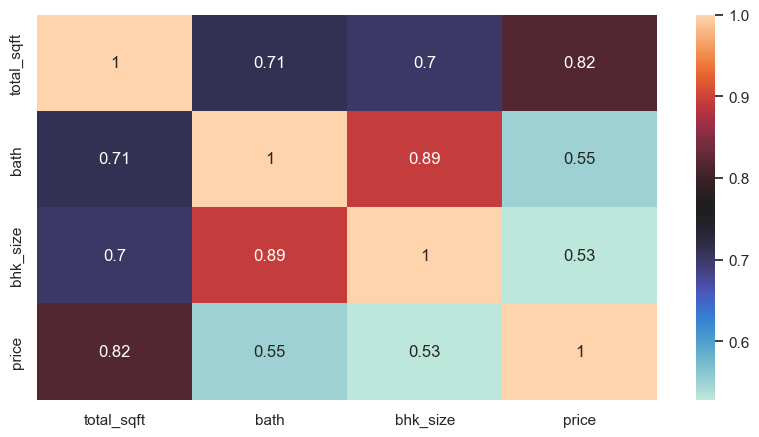

In [98]:
# Compute the correlation matrix
corr = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations and icefire color map
sns.heatmap(corr, annot=True, cmap='icefire')

# Show the plot
plt.show()

- Correlation between price and Total Sqft is 82% which is quite high
- So as the total sqft increases, the price tends to increase as well, the relationship is a strong.
- The correlation between price and Bath is 55%, while the correlation between price and BHK size is 53%. So the correlation between them are moderate.
- So Properties with more bathroom and more bedrooms generally have higher prices, the relationship is not as strong as with total sqft

## One-Hot Encoding for Location

In [99]:
# Convert the 'location' column into one-hot encoded columns
location_dummies = pd.get_dummies(df['location'])

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, location_dummies], axis=1)

# Drop the original 'location' column
df.drop('location', axis=1, inplace=True)

# Display the DataFrame after one-hot encoding
df.head()

,total_sqft,bath,bhk_size,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Drop the original 'location' column
df.drop('other', axis=1, inplace=True)

In [101]:
df.head()

,total_sqft,bath,bhk_size,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df.shape

(7229, 244)

# Model Building

In [103]:
# Separating features (X) and target variable (y)
X = df.drop(['price'], axis='columns')
y = df.price

In [104]:
from sklearn.model_selection import train_test_split  # Importing train_test_split function

# Splitting the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size=0.2: 20% of the data will be used for testing
# random_state=42: Random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge  # Importing linear regression models
from sklearn.tree import DecisionTreeRegressor  # Importing decision tree regression model
from sklearn.ensemble import RandomForestRegressor  # Importing random forest regression model

# Initialize Linear Regression model
linear_regression_model = LinearRegression()

# Initialize Lasso Regression model
lasso_regression_model = Lasso()

# Initialize Ridge Regression model
ridge_regression_model = Ridge()

# Initialize Decision Tree Regression model
decision_tree_regression_model = DecisionTreeRegressor()

# Initialize Random Forest Regression model
random_forest_regression_model = RandomForestRegressor()

In [106]:
# Model Training
# Fit the Linear Regression model with training data
linear_regression_model.fit(X_train, y_train)

# Fit the Lasso Regression model with training data
lasso_regression_model.fit(X_train, y_train)

# Fit the Ridge Regression model with training data
ridge_regression_model.fit(X_train, y_train)

# Fit the Decision Tree Regression model with training data
decision_tree_regression_model.fit(X_train, y_train)

# Fit the Random Forest Regression model with training data
random_forest_regression_model.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
# Model Evaluation

# Making predictions using linear regression model
linear_regression_predictions = linear_regression_model.predict(X_test)

# Making predictions using lasso regression model
lasso_regression_predictions = lasso_regression_model.predict(X_test)

# Making predictions using ridge regression model
ridge_regression_predictions = ridge_regression_model.predict(X_test)

# Making predictions using decision tree regression model
decision_tree_regression_predictions = decision_tree_regression_model.predict(X_test)

# Making predictions using random forest regression model
random_forest_regression_predictions = random_forest_regression_model.predict(X_test)

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Importing regression metrics
from sklearn.metrics import accuracy_score  # Importing classification metric


# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, linear_regression_predictions)
mse_lasso = mean_squared_error(y_test, lasso_regression_predictions)
mse_ridge = mean_squared_error(y_test, ridge_regression_predictions)
mse_decision_tree = mean_squared_error(y_test, decision_tree_regression_predictions)
mse_random_forest = mean_squared_error(y_test, random_forest_regression_predictions)

# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, linear_regression_predictions)
mae_lasso = mean_absolute_error(y_test, lasso_regression_predictions)
mae_ridge = mean_absolute_error(y_test, ridge_regression_predictions)
mae_decision_tree = mean_absolute_error(y_test, decision_tree_regression_predictions)
mae_random_forest = mean_absolute_error(y_test, random_forest_regression_predictions)

# Calculate R-squared
r2_linear = r2_score(y_test, linear_regression_predictions)
r2_lasso = r2_score(y_test, lasso_regression_predictions)
r2_ridge = r2_score(y_test, ridge_regression_predictions)
r2_decision_tree = r2_score(y_test, decision_tree_regression_predictions)
r2_random_forest = r2_score(y_test, random_forest_regression_predictions)

# Calculate adjusted R-squared
def adjusted_r_squared(y_true, y_pred, n_features):
    """
    Calculate adjusted R-squared value.

    Parameters:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
        n_features (int): Number of features in the model.

    Returns:
        float: Adjusted R-squared value.

    Formula:
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
        where:
        r2 = R-squared value
        n = Number of samples
        k = Number of features
    """
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return adjusted_r2


adjusted_r2_linear = adjusted_r_squared(y_test, linear_regression_predictions, X_test.shape[1])
adjusted_r2_lasso = adjusted_r_squared(y_test, lasso_regression_predictions, X_test.shape[1])
adjusted_r2_ridge = adjusted_r_squared(y_test, ridge_regression_predictions, X_test.shape[1])
adjusted_r2_decision_tree = adjusted_r_squared(y_test, decision_tree_regression_predictions, X_test.shape[1])
adjusted_r2_random_forest = adjusted_r_squared(y_test, random_forest_regression_predictions, X_test.shape[1])

# Calculate Accuracy Score
accuracy_linear = linear_regression_model.score(X_test,y_test)
accuracy_lasso = lasso_regression_model.score(X_test,y_test)
accuracy_ridge = ridge_regression_model.score(X_test,y_test)
accuracy_decision_tree = decision_tree_regression_model.score(X_test,y_test)
accuracy_random_forest = random_forest_regression_model.score(X_test,y_test)

In [109]:
# Print the evaluation metrics with values rounded to two decimal places
print("Linear Regression:")
print("MSE:", round(mse_linear, 2))
print("MAE:", round(mae_linear, 2))
print("R-squared:", round(r2_linear, 2))
print("Adjusted R-squared:", round(adjusted_r2_linear, 2))
print('Accuracy Score :', round(accuracy_linear * 100, 2))

Linear Regression:
MSE: 2343.49
MAE: 26.52
R-squared: 0.79
Adjusted R-squared: 0.75
Accuracy Score : 79.07


In [110]:
# Print the evaluation metrics with values rounded to two decimal places
print("Lasso:")
print("MSE:", round(mse_lasso, 2))
print("MAE:", round(mae_lasso, 2))
print("R-squared:", round(r2_lasso, 2))
print("Adjusted R-squared:", round(adjusted_r2_lasso, 2))
print('Accuracy Score :', round(accuracy_lasso * 100, 2))

Lasso:
MSE: 3718.94
MAE: 33.8
R-squared: 0.67
Adjusted R-squared: 0.6
Accuracy Score : 66.79


In [111]:
# Print the evaluation metrics with values rounded to two decimal places
print("Ridge:")
print("MSE:", round(mse_ridge, 2))
print("MAE:", round(mae_ridge, 2))
print("R-squared:", round(r2_ridge, 2))
print("Adjusted R-squared:", round(adjusted_r2_ridge, 2))
print('Accuracy Score:', round(accuracy_ridge * 100, 2))

Ridge:
MSE: 2386.19
MAE: 26.38
R-squared: 0.79
Adjusted R-squared: 0.74
Accuracy Score: 78.69


In [112]:
# Print the evaluation metrics with rounded values
print("Decision Tree Regression:")
print("MSE:", round(mse_decision_tree, 2))
print("MAE:", round(mae_decision_tree, 2))
print("R-squared:", round(r2_decision_tree, 2))
print("Adjusted R-squared:", round(adjusted_r2_decision_tree, 2))
print('Accuracy Score :', round(accuracy_decision_tree * 100, 2))

Decision Tree Regression:
MSE: 5017.55
MAE: 29.12
R-squared: 0.55
Adjusted R-squared: 0.46
Accuracy Score : 55.19


In [113]:
# Print the evaluation metrics
print("Random Forest Regression:")
print("MSE:", round(mse_random_forest, 2))
print("MAE:", round(mae_random_forest, 2))
print("R-squared:", round(r2_random_forest, 2))
print("Adjusted R-squared:", round(adjusted_r2_random_forest, 2))
print('Accuracy Score:', round(accuracy_random_forest * 100, 2))

Random Forest Regression:
MSE: 3681.3
MAE: 26.54
R-squared: 0.67
Adjusted R-squared: 0.6
Accuracy Score: 67.12


In [114]:
data = {
    'Model Name': ['Linear Regression Model', 'Lasso Regression Model', 'Ridge Regression Model', 'Decision Tree Regression Model', 'Random Forest Regression Model'],
    'MSE': [2343.49, 3718.94, 2386.19, 5407.55, 3704.41],
    'MAE': [26.52, 33.8, 26.38, 29.74, 26.5],
    'R-Squared': [0.79, 0.67, 0.79, 0.52, 0.67],
    'Adjusted R-Squared': [0.75, 0.6, 0.74, 0.42, 0.6],
    'Accuracy Score': [79.07, 66.79, 78.69, 51.71, 66.92]
}

# Creating a DataFrame from the data
df7 = pd.DataFrame(data)

# Displaying the DataFrame
df7 # DataFrame displaying performance metrics of different regression models

,Model Name,MSE,MAE,R-Squared,Adjusted R-Squared,Accuracy Score
0,Linear Regression Model,2343.49,26.52,0.79,0.75,79.07
1,Lasso Regression Model,3718.94,33.80,0.67,0.60,66.79
2,Ridge Regression Model,2386.19,26.38,0.79,0.74,78.69
3,Decision Tree Regression Model,5407.55,29.74,0.52,0.42,51.71
4,Random Forest Regression Model,3704.41,26.50,0.67,0.60,66.92


- MSE (Mean Squared Error): Lower values indicate better performance.
- MAE (Mean Absolute Error): Lower values indicate better performance.
- R-squared: Closer to 1 indicates better fit of the model to the data.
- Adjusted R-squared: Similar interpretation to R-squared, but adjusted for the number of predictors. Closer to 1 indicates better fit.

- Based on these metrics, the **Linear Regression model** appears to perform the best overall, as it has the lowest MSE, lowest MAE, highest R-squared, highest Adjusted R-squared, and highest Accuracy Score among the models provided.

# Result

## Final Model - Linear Regression 

In [115]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model from scikit-learn

# Initialize Linear Regression model
linear_regression_model = LinearRegression()

# Train the Linear Regression model
linear_regression_model.fit(X_train, y_train)

# Make predictions using the trained model
linear_regression_predictions = linear_regression_model.predict(X_test)

In [116]:
# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, linear_regression_predictions)

# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, linear_regression_predictions)

# Calculate R-squared
r2_linear = r2_score(y_test, linear_regression_predictions)

# Calculate adjusted R-squared
adjusted_r2_linear = adjusted_r_squared(y_test, linear_regression_predictions, X_test.shape[1])

# Calculate Accuracy Score
accuracy_linear = linear_regression_model.score(X_test, y_test)

In [117]:
# Print the evaluation metrics with values rounded to two decimal places
print("Linear Regression:")
print("MSE:", round(mse_linear, 2))
print("MAE:", round(mae_linear, 2))
print("R-squared:", round(r2_linear, 2))
print("Adjusted R-squared:", round(adjusted_r2_linear, 2))
print('Accuracy Score :', round(accuracy_linear * 100, 2))

Linear Regression:
MSE: 2343.49
MAE: 26.52
R-squared: 0.79
Adjusted R-squared: 0.75
Accuracy Score : 79.07


In [118]:
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': linear_regression_predictions.flatten()})
result_df  # Displaying a DataFrame containing actual and predicted values

,Actual,Predicted
0,41.000,32.326190
1,95.000,138.118062
2,46.550,50.498474
3,92.000,144.421649
4,105.000,96.359611
...,...,...
1441,65.500,49.020616
1442,67.300,62.725964
1443,19.695,-9.696108
1444,100.000,126.529523


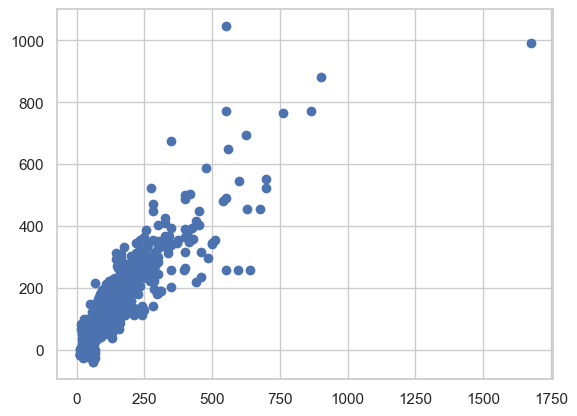

In [119]:
plt.scatter(y_test , linear_regression_predictions)  # Scatter plot of y_test and linear regression predictions
plt.show()  # Display the plot

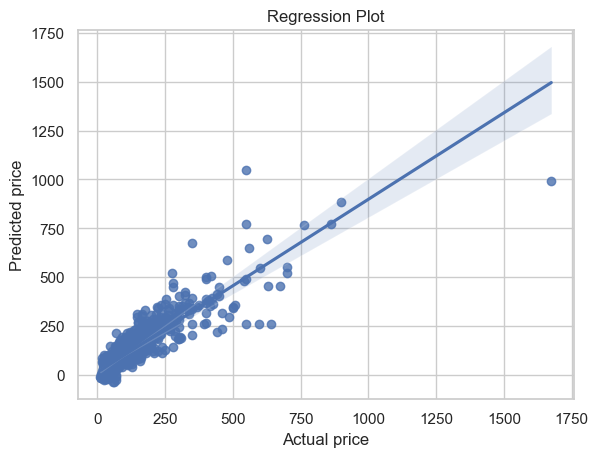

In [120]:
# Create a regression plot using seaborn to visualize the relationship between actual and predicted prices
sns.regplot(x=y_test, y=linear_regression_predictions)

# Label the x-axis with 'Actual price' and the y-axis with 'Predicted price'
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

# Set the title of the plot to 'Regression Plot'
plt.title('Regression Plot')

# Display the plot
plt.show()

- Here, points clustered closely around the diagonal line. So We can say that model is predicting accurately. 
- Here we are able to find best fitline as well.

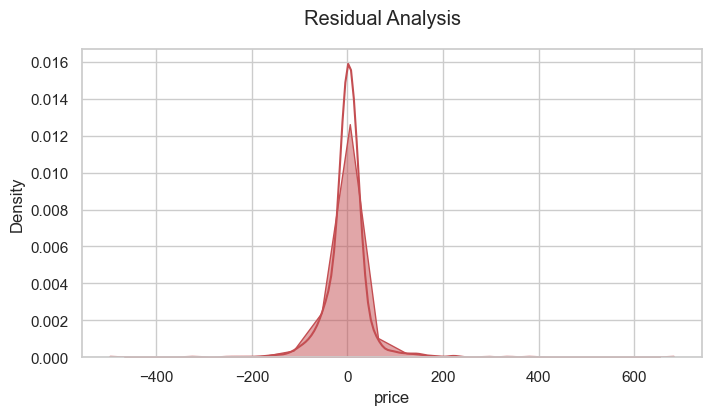

In [121]:
# Residual Analysis:

# Create a figure with specified size
fig = plt.figure(figsize=(8,4))

# Plot a histogram of the residuals (the differences between actual and predicted values)
# 'bins=20' sets the number of bins in the histogram
# 'color='r'' sets the color of the histogram bars to red
# 'stat='density'' normalizes the histogram so that the total area under the histogram is 1
# 'kde=True' adds a kernel density estimate curve to the plot
# 'element='poly'' sets the style of the histogram bars to be polygonal
sns.histplot((y_test - linear_regression_predictions), bins=20, color='r', stat='density', kde=True, element='poly')

# Add a title to the figure
fig.suptitle('Residual Analysis')

plt.show()  # Show the plot

- Here we can see that the residuals in the residual analysis plot are normally distributed around zero, it suggests that the model's predictions are accurate and unbiased.

# Insights

- “Location”,  “Total_Sqft”,  “Bath” and “Size”  are important features for predicting the prices of the houses.
- Hebbal, Sarjapur Road and Whitefield are the top 3 locations that have the highest prices for houses.
- The total square feet of a house can potentially increase its value. 
- Houses with a higher number of bathrooms tend to have higher prices.
- Houses with more bedrooms (larger BHK sizes) tend to have higher prices than houses with fewer bedrooms.
- Predicting house prices has practical applications across various sectors, helping stakeholders make informed decisions related to real estate investment, homeownership, mortgage lending, market analysis, urban planning, and risk management.

### ______________________________End of the project______________________________

In [1]:
a = [0,1,2,3]

In [ ]:
a.insert(8,5)
a.insert(5,9)